# **ETL**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [55]:
import os
current_dir = os.getcwd()
current_dir



'c:\\Users\\M4x1m\\OneDrive\\Dokumente\\VS Code\\Code Institude\\car-price-analysis-hackathon-team4'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [42]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [43]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\M4x1m\\OneDrive\\Dokumente\\VS Code\\Code Institude'

# Loading the dataset and initial checks

Section 1 content

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
ls

 Datentr�ger in Laufwerk C: ist System
 Volumeseriennummer: C098-EA18

 Verzeichnis von c:\Users\M4x1m\OneDrive\Dokumente\VS Code\Code Institude\car-price-analysis-hackathon-team4

08.09.2025  11:57    <DIR>          .
08.09.2025  11:57    <DIR>          ..
08.09.2025  10:44               146 .gitignore
08.09.2025  10:44                 6 .python-version
08.09.2025  10:44                30 .slugignore
08.09.2025  10:55    <DIR>          .venv
08.09.2025  11:57    <DIR>          Dashboard
08.09.2025  11:57    <DIR>          Data
08.09.2025  15:42    <DIR>          jupyter_notebooks
08.09.2025  11:57    <DIR>          Media
08.09.2025  10:44                42 Procfile
08.09.2025  10:44             4.253 README.md
08.09.2025  10:44               472 requirements.txt
08.09.2025  10:44               141 setup.sh
               7 Datei(en),          5.090 Bytes
               7 Verzeichnis(se), 21.824.266.240 Bytes frei


Load the dataset:
Use pandas to read the raw car data CSV file into a DataFrame.
Check the shape:
Display the number of rows and columns in the loaded DataFrame to understand the dataset size.

In [135]:
df = pd.read_csv('Data/raw/cars.csv')
df.shape

(205, 26)

View DataFrame Information:
Display a concise summary of the DataFrame, including column names, data types, and non-null counts. This helps to quickly assess the structure and completeness of the dataset.

In [136]:
df.info

<bound method DataFrame.info of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible   

Preview the Data:
Display the first few rows of the DataFrame to get an initial look at the dataset and verify that it loaded correctly.

In [137]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Summary Statistics:
Generate descriptive statistics for the numerical columns in the DataFrame, such as mean, standard deviation, min, max, and quartiles. This provides a quick overview of the data distribution and helps identify potential outliers or anomalies.

In [138]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


List DataFrame Columns:
Display all column names in the DataFrame to review the available features and ensure the expected structure.

In [139]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

---

# Cleaning

Check for Duplicate Rows:
Count the number of duplicate rows in the DataFrame to identify potential data quality issues and ensure the uniqueness of records.

In [63]:
df.duplicated().sum()

0

List DataFrame Columns:
Display all column names in the DataFrame to review the available features and ensure the expected structure.

In [64]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Extract Brand and Model Information:
Split the CarName column into separate brand and model columns for more granular analysis.
Remove the original CarName column to avoid redundancy, and preview the updated DataFrame to verify the changes.

In [65]:
# Extract brand and model from CarName column
df[['brand', 'model']] = df['CarName'].str.split(' ', n=1, expand=True)
# drop CarName column
df = df.drop('CarName', axis=1)
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,model
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


Reorder Columns for Clarity:
Move the brand and model columns to immediately follow car_ID in the DataFrame.
This improves readability and makes it easier to analyze car attributes together.
Preview the updated DataFrame to confirm the new column order.

In [66]:
# Reorder columns to place 'brand' and 'model' right after 'car_ID'
cols = list(df.columns)
car_id_index = cols.index('car_ID')

# Remove brand and model from their current positions
cols.remove('brand')
cols.remove('model')

# Insert brand and model right after car_ID
cols[car_id_index+1:car_id_index+1] = ['brand', 'model']
df = df[cols]
df.head()

,car_ID,brand,model,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,alfa-romero,giulia,3,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,alfa-romero,stelvio,3,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,alfa-romero,Quadrifoglio,1,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,audi,100 ls,2,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,audi,100ls,2,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Standardize Brand Names:
Replace typos and inconsistencies in the brand column to ensure all car brands are labeled consistently for analysis and visualization.
Display the unique brand names after correction to verify the changes.

In [133]:
# Standardize brand names to correct typos and inconsistencies
# This ensures all brands are consistently labeled for analysis and visualization
brand_corrections = {
    'maxda': 'mazda',
    'Nissan': 'nissan',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen',
    'alfa-romero': 'alfa-romeo'
}
df['brand'] = df['brand'].replace(brand_corrections)
df['brand'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Check for Missing Values:
Count the number of missing (null) values in each column to identify incomplete data and guide further cleaning steps.

In [134]:
df.isnull().sum() # Check for missing values

brand                 0
model                 0
symboling             0
fueltype              0
aspiration            0
doornumber          205
carbody               0
drivewheel            0
enginelocation        0
wheelbase             0
carlength             0
carwidth              0
carheight             0
curbweight            0
enginetype            0
cylindernumber      205
enginesize            0
fuelsystem            0
boreratio             0
stroke                0
compressionratio      0
horsepower            0
peakrpm               0
citympg               0
highwaympg            0
price                 0
dtype: int64

Handle Missing Model Names:
Fill any missing values in the model column with 'unknown' to maintain data integrity.
Recheck for missing values in all columns to confirm that the issue has been addressed.

In [69]:
df['model'] = df['model'].fillna('null') # Fill missing model names with 'null'
df.isnull().sum()

car_ID              0
brand               0
model               0
symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Check Data Types:
Display the data type of each column in the DataFrame to ensure correct formats for analysis and identify any columns that may need conversion.

In [130]:
df.dtypes

brand                object
model                object
symboling             int64
fueltype             object
aspiration           object
doornumber          float64
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber      float64
enginesize          float64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price                 int32
dtype: object

Explore Unique Values in Each Column:
Print the unique values for every column in the DataFrame to understand the range and categories of data present, and to identify potential issues or patterns for further analysis.

In [131]:
# Display unique values for every column
for col in df.columns:
    print(f'Unique values in {col}:')
    print(df[col].unique())
    print('-'*40)

Unique values in brand:
['alfa-romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
----------------------------------------
Unique values in model:
['giulia' 'stelvio' 'Quadrifoglio' '100 ls' '100ls' 'fox' '5000' '4000'
 '5000s (diesel)' '320i' 'x1' 'x3' 'z4' 'x4' 'x5' 'impala' 'monte carlo'
 'vega 2300' 'rampage' 'challenger se' 'd200' 'monaco (sw)' 'colt hardtop'
 'colt (sw)' 'coronet custom' 'dart custom' 'coronet custom (sw)' 'civic'
 'civic cvcc' 'accord cvcc' 'accord lx' 'civic 1500 gl' 'accord'
 'civic 1300' 'prelude' 'civic (auto)' 'MU-X' 'D-Max ' 'D-Max V-Cross'
 'xj' 'xf' 'xk' 'rx3' 'glc deluxe' 'rx2 coupe' 'rx-4' '626' 'glc'
 'rx-7 gs' 'glc 4' 'glc custom l' 'glc custom' 'electra 225 custom'
 'century luxus (sw)' 'century' 'skyhawk' 'opel isuzu deluxe' 'skylark'
 'century special' 'regal sport coupe (turbo)' 'cougar' 'mirage' 

# Transforming

Convert Textual Numbers to Integers:
Map the text values in the doornumber and cylindernumber columns to their corresponding integer values.
This conversion makes the data more suitable for mathematical operations, comparisons, and visualizations.
Preview the updated columns to verify the changes.

In [132]:
# Convert 'doornumber' and 'cylindernumber' from text to integers
# By mapping these words to their corresponding integer values, the data is more suitable for mathematical operations, comparisons, and visualizations.

number_map = {'two': 2, 'four': 4, 'three': 3, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
df['doornumber'] = df['doornumber'].map(number_map)
df['cylindernumber'] = df['cylindernumber'].map(number_map)

df[['doornumber', 'cylindernumber']].head()

,doornumber,cylindernumber
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


Convert Price Values to Integers:
Round the values in the price column and convert them to integers to ensure consistency and facilitate numerical analysis.

In [77]:
# Convert all price values to integers
df['price'] = df['price'].round().astype(int)

Convert Engine Size to Liters:

Transform the enginesize column from cubic inches to liters by dividing each value by 60. Then, round the results to two decimal places for consistency and readability. This ensures all engine size values are in a standard metric unit suitable for analysis.

In [85]:
df['enginesize'] = df['enginesize']/60 # Convert enginesize from cubic inches to liters
df['enginesize'] = df['enginesize'].round(2).astype(float)
df.head()

,brand,model,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romeo,giulia,3,gas,std,NaN,convertible,rwd,front,88.6,...,0.0,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romeo,stelvio,3,gas,std,NaN,convertible,rwd,front,88.6,...,0.0,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romeo,Quadrifoglio,1,gas,std,NaN,hatchback,rwd,front,94.5,...,0.0,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,100 ls,2,gas,std,NaN,sedan,fwd,front,99.8,...,0.0,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,100ls,2,gas,std,NaN,sedan,4wd,front,99.4,...,0.0,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Create Outlier Summary Table:

Generate a summary table that lists, for each numeric feature, the indices and values of detected outliers. This helps to quickly identify which rows (cars) have unusually high or low values for specific features, supporting further investigation or data cleaning. The table provides a clear overview of outlier distribution across the dataset.



In [84]:
# Create a table showing outliers for every column
outlier_table = []
for col in outlier_flags.columns:
    outlier_indices = df.index[outlier_flags[col]].tolist()
    outlier_values = df.loc[outlier_flags[col], col].tolist()
    outlier_table.append({
        'Feature': col,
        'Outlier_Indices': outlier_indices,
        'Outlier_Values': outlier_values
    })

outlier_table_df = pd.DataFrame(outlier_table)
outlier_table_df


KeyError: 'car_ID'

Visualize Outliers with Box Plots:

Display box plots for the cylindernumber and enginesize features to identify the distribution and spot potential outliers. Box plots provide a clear summary of the data’s spread, median, and extreme values for each feature. 

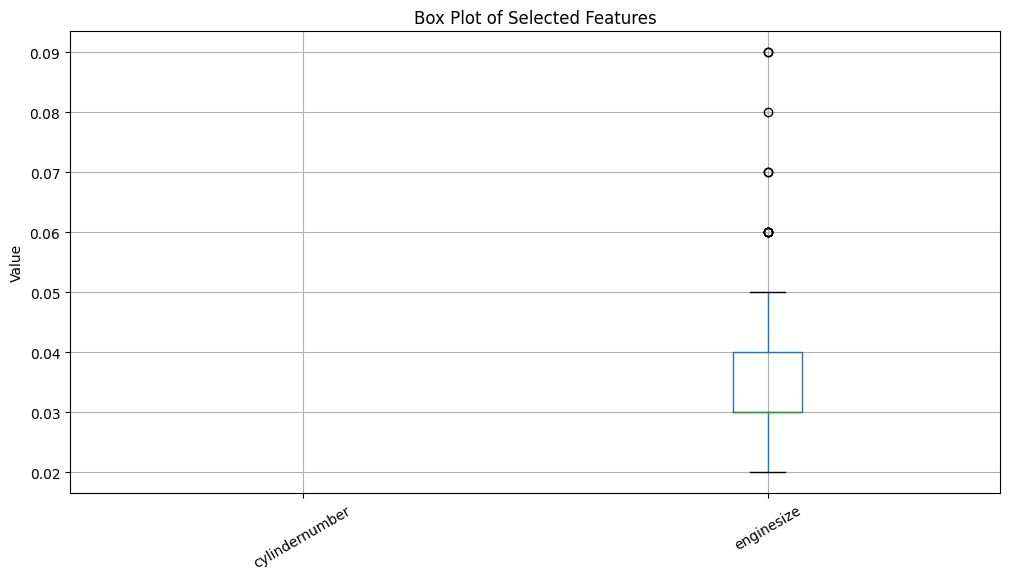

In [82]:
features = ['cylindernumber', 'enginesize']
plt.figure(figsize=(12, 6))
df[features].boxplot()
plt.title('Box Plot of Selected Features')
plt.ylabel('Value')
plt.xticks(rotation=30)
plt.show()

Conclusion: Outliers in the dataset are not random; they cluster in certain features (wheelbase, engine size, cylinder number, price). This is expected in car data, as rare or luxury cars often have extreme values in multiple attributes. They are considered as valid, so they will not be removed.

In [86]:
df.drop(columns=("car_ID"), inplace=True) # Drop car_ID column as it is not needed for analysis 

KeyError: "['car_ID'] not found in axis"

# Camparability Feature

normalizing all colums and summing them up go get a final score which can be compared





In [109]:
comp = df.copy()
comp.head()


,brand,model,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romeo,giulia,3,gas,std,NaN,convertible,rwd,front,88.6,...,0.0,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romeo,stelvio,3,gas,std,NaN,convertible,rwd,front,88.6,...,0.0,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romeo,Quadrifoglio,1,gas,std,NaN,hatchback,rwd,front,94.5,...,0.0,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,100 ls,2,gas,std,NaN,sedan,fwd,front,99.8,...,0.0,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,100ls,2,gas,std,NaN,sedan,4wd,front,99.4,...,0.0,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Dropping columns that are not technically comparable, as they primarily reflect style or categorical choices rather than measurable performance or specifications.

In [110]:
comp.drop(columns=['brand',
                    'model',
                    'carbody',
                    'fueltype', 
                    'aspiration', 
                    'carbody', 
                    'drivewheel', 
                    'enginelocation', 
                    'fuelsystem'], inplace=True)
comp.head(20)


,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,NaN,88.6,168.8,64.1,48.8,2548,dohc,NaN,0.0,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,88.6,168.8,64.1,48.8,2548,dohc,NaN,0.0,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,94.5,171.2,65.5,52.4,2823,ohcv,NaN,0.0,2.68,3.47,9.0,154,5000,19,26,16500
3,2,NaN,99.8,176.6,66.2,54.3,2337,ohc,NaN,0.0,3.19,3.40,10.0,102,5500,24,30,13950
4,2,NaN,99.4,176.6,66.4,54.3,2824,ohc,NaN,0.0,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,99.8,177.3,66.3,53.1,2507,ohc,NaN,0.0,3.19,3.40,8.5,110,5500,19,25,15250
6,1,NaN,105.8,192.7,71.4,55.7,2844,ohc,NaN,0.0,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,105.8,192.7,71.4,55.7,2954,ohc,NaN,0.0,3.19,3.40,8.5,110,5500,19,25,18920
8,1,NaN,105.8,192.7,71.4,55.9,3086,ohc,NaN,0.0,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,99.5,178.2,67.9,52.0,3053,ohc,NaN,0.0,3.13,3.40,7.0,160,5500,16,22,17859


In [111]:
comp.isna().sum()



symboling             0
doornumber          205
wheelbase             0
carlength             0
carwidth              0
carheight             0
curbweight            0
enginetype            0
cylindernumber      205
enginesize            0
boreratio             0
stroke                0
compressionratio      0
horsepower            0
peakrpm               0
citympg               0
highwaympg            0
price                 0
dtype: int64

In [125]:
# Fill missing values in 'doornumber' with the mean value
comp['doornumber']



0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
200   NaN
201   NaN
202   NaN
203   NaN
204   NaN
Name: doornumber, Length: 205, dtype: float64

In [113]:
# small number of missing values in 'cylindernumber', we can fill them with the mode (most frequent value)
mode_series = comp['cylindernumber'].mode()
if not mode_series.empty:
	fill_value = mode_series[0]
comp['cylindernumber'] = comp['cylindernumber'].fillna(fill_value).astype(int)
comp['cylindernumber'].head()

0    4
1    4
2    4
3    4
4    4
Name: cylindernumber, dtype: int32

In [106]:
comp.isna().sum()

symboling           0
doornumber          0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
